### Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

* State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
* Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
* Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
* If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

### Problem 1B:

* What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]
* Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
* Explain the business implications of performing ANOVA for this particular case study.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import(pairwise_tukeyhsd, MultiComparison)
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
salary = pd.read_csv('SalaryData.csv')

In [3]:
salary.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
# check duplicates
salary.duplicated().sum()

0

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
salary.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [7]:
salary.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### For Education

### For Occupation

In [8]:
salary.Education = pd.Categorical(salary.Education)

In [9]:
salary.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
salary.Occupation = pd.Categorical(salary.Occupation)

In [11]:
salary.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [12]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
formula = 'Salary ~ C(Education)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


### Pvalue is 1.257709e-08 that is less than 5% or 0.05 alpha
### Hence we reject null hypothesis

## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [14]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


### pvalue is 0.458508 that is greater than 5% or 0.05 alpha
### Hence we fail to reject null hypothesis

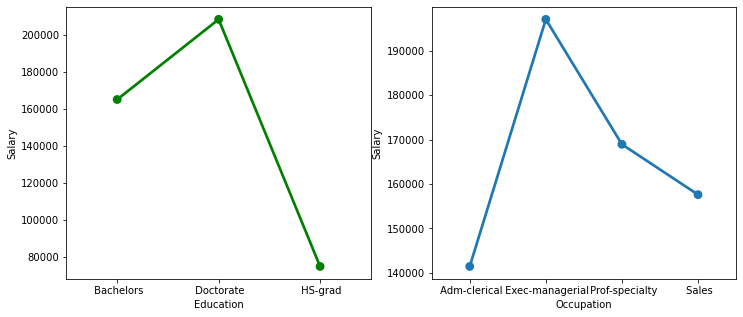

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.pointplot(x='Education',y='Salary',data=salary,ci=None,color='g');
plt.subplot(1,2,2)
sns.pointplot(x='Occupation',y='Salary',data=salary,ci=None);

## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
salary['Education']= le.fit_transform(salary['Education'])
salary['Occupation']= le.fit_transform(salary['Occupation'])

In [17]:
# On Education
mc = MultiComparison(salary['Education'],salary['Occupation'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1     -0.8 0.2343  -1.917  0.317  False
     0      2  -0.0769    0.9 -0.9347 0.7808  False
     0      3  -0.0833    0.9 -0.9565 0.7898  False
     1      2   0.7231 0.2834 -0.3501 1.7962  False
     1      3   0.7167 0.3004 -0.3688 1.8022  False
     2      3  -0.0064    0.9 -0.8228   0.81  False
---------------------------------------------------


In [18]:
# On Occupation
mc = MultiComparison(salary['Occupation'],salary['Education'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1     0.15   0.9 -0.8961 1.1961  False
     0      2   0.0667   0.9 -1.1606 1.2939  False
     1      2  -0.0833   0.9 -1.2961 1.1295  False
--------------------------------------------------


## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [19]:
salary_interaction = pd.read_csv('SalaryData.csv')

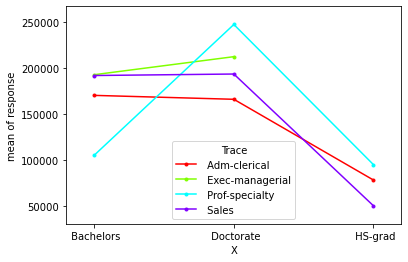

In [20]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(salary_interaction['Education']),np.array(salary_interaction['Occupation']),np.array(salary_interaction['Salary']));

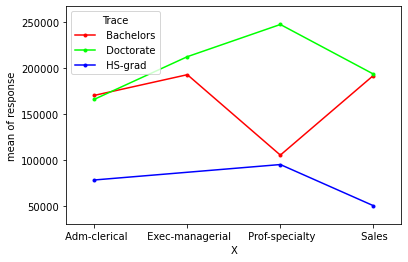

In [21]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(salary_interaction['Occupation']),np.array(salary_interaction['Education']),np.array(salary_interaction['Salary']),);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [22]:
formula = 'Salary ~ C(Education)+C(Occupation)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

In [23]:
# Solution 1.6
formula = 'Salary ~ C(Education)+C(Occupation)+C(Education):C(Occupation)'
model = ols(formula,salary).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

Due to the inclusion of the interaction effect term, [ education : occupation ] we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.

we see that the p-value of the interaction effect term of 'Education' and 'Occupation' suggests that we reject the Null Hypothesis.


## 1.7 Explain the business implications of performing ANOVA for this particular case study.

*	As the Education level increases the salary gets increases.
*	Doctorates are suitable for all the roles and they are getting paid highly than anyone.
*	We must also note that occupation and education alone impact the salary, there are few more other important variables which can impact salary such as years of experience, specialisation, past experience, extra courses, certifications, etc.
*	To decide the salary HR department plays important role by setting up salary based on the experiences.

#### Anoav compares means, if the means are organized through one factore, it is one way anova. If these means are corresponded to two different treatements. This is called Two-way Anova. With or without interaction. Anova executes the business decision by simply comparing an associated p-value of the F-statistic with a significance level.

#### Assumptions of Anova:
*	Dependent variables should be measured at continuous level.
*	Two independent variables should each consist of tow or more independent groups.
*	There should be no outliers.
*	Dependent variable should be normally distributed.


### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

* Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
* Is scaling necessary for PCA in this case? Give justification and perform scaling.
* Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].
* Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]
* Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]
Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features
* Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]
* Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
* Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [24]:
education = pd.read_csv('Education+-+Post+12th+Standard.csv')
education.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [25]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [26]:
education.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [27]:
education.duplicated().sum()

0

In [28]:
education.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### Univariate Analysis

In [29]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(education[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(education[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=education[column])
    plt.show()

In [30]:
education_num = education.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(education_num.columns.values)
len(lstnumericcolumns)

17

In [31]:
education_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


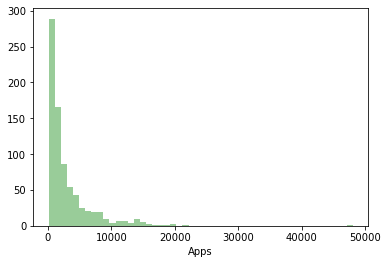

BoxPlot of Apps
----------------------------------------------------------------------------


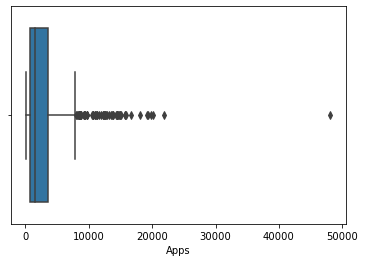

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


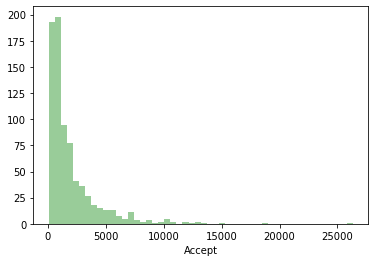

BoxPlot of Accept
----------------------------------------------------------------------------


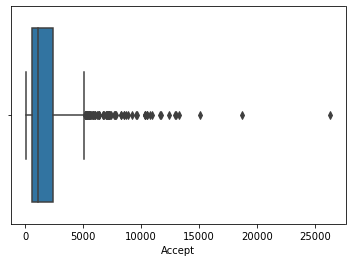

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


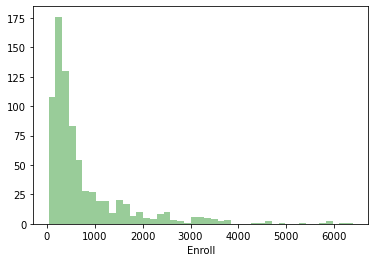

BoxPlot of Enroll
----------------------------------------------------------------------------


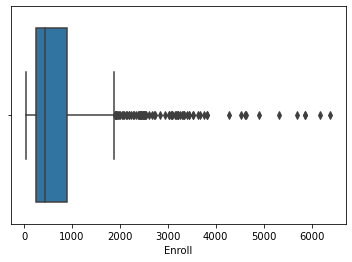

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


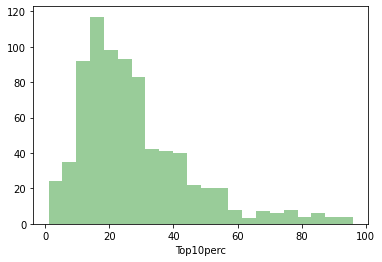

BoxPlot of Top10perc
----------------------------------------------------------------------------


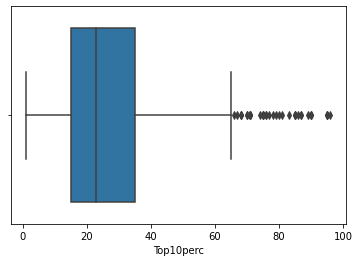

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


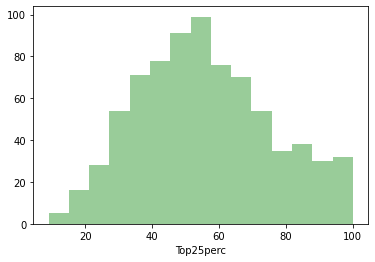

BoxPlot of Top25perc
----------------------------------------------------------------------------


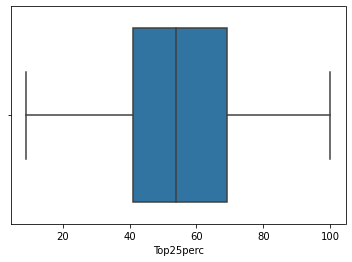

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


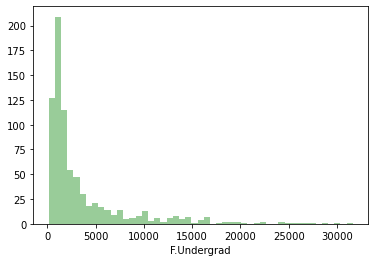

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


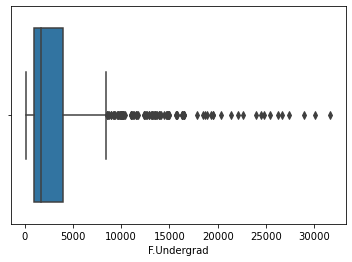

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


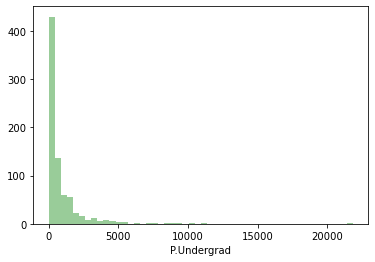

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


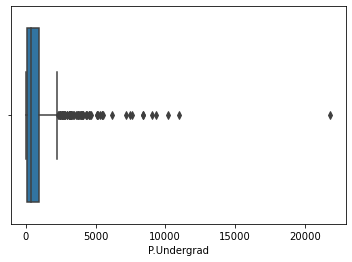

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


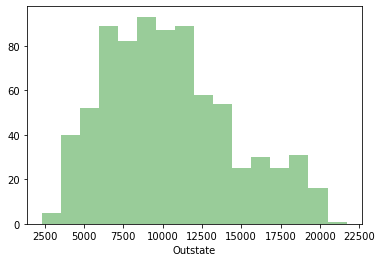

BoxPlot of Outstate
----------------------------------------------------------------------------


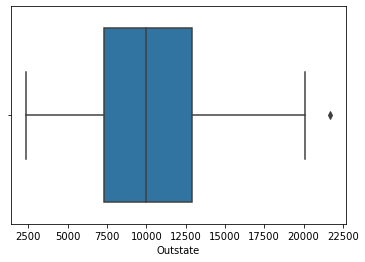

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


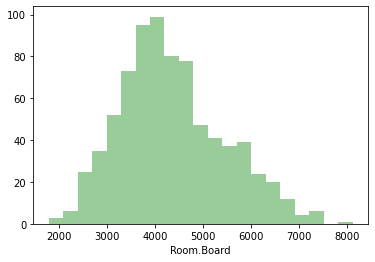

BoxPlot of Room.Board
----------------------------------------------------------------------------


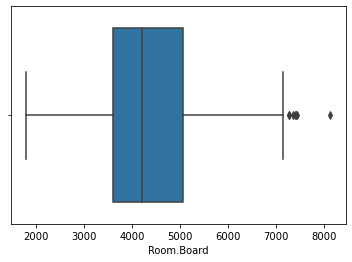

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


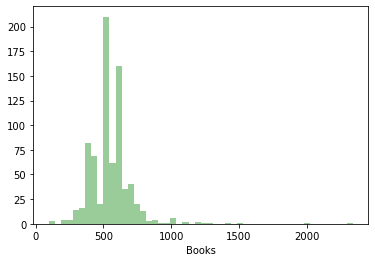

BoxPlot of Books
----------------------------------------------------------------------------


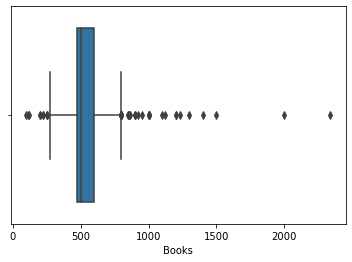

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


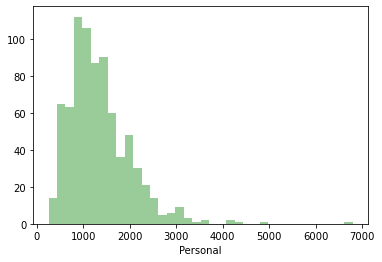

BoxPlot of Personal
----------------------------------------------------------------------------


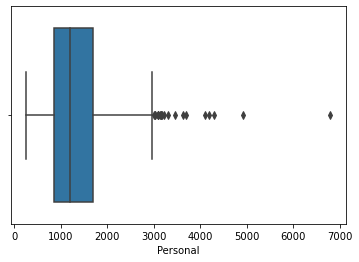

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


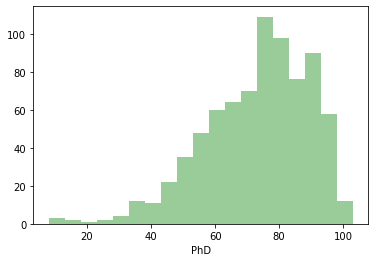

BoxPlot of PhD
----------------------------------------------------------------------------


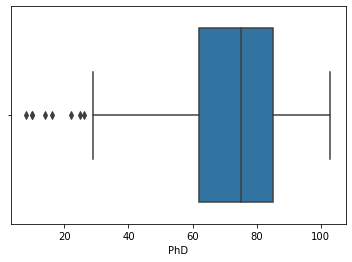

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


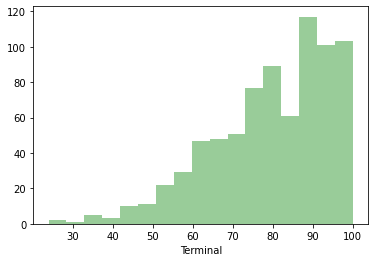

BoxPlot of Terminal
----------------------------------------------------------------------------


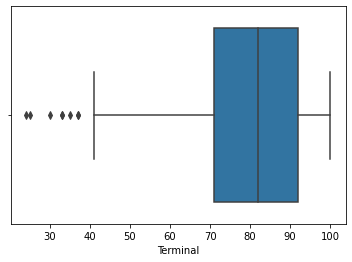

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


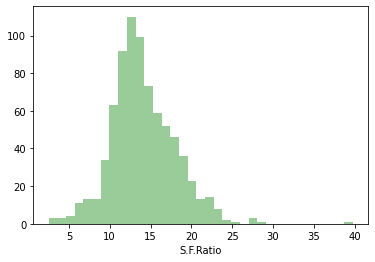

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


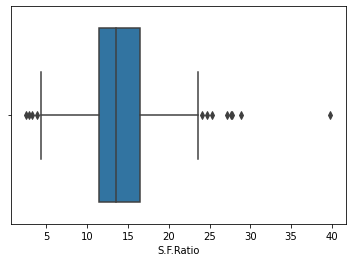

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


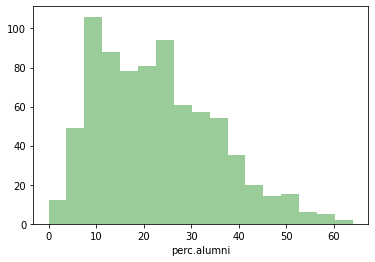

BoxPlot of perc.alumni
----------------------------------------------------------------------------


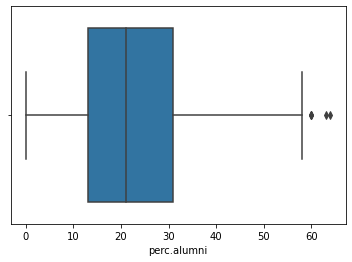

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


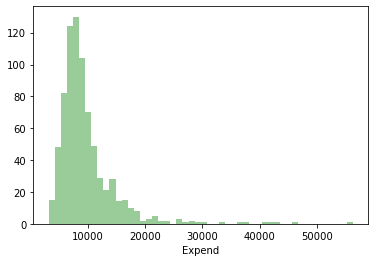

BoxPlot of Expend
----------------------------------------------------------------------------


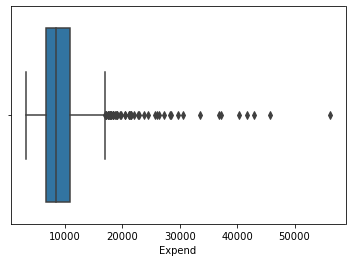

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


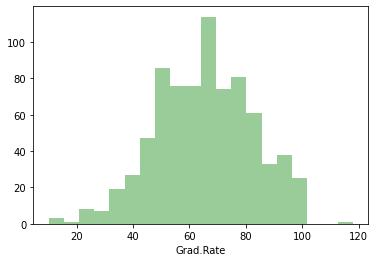

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


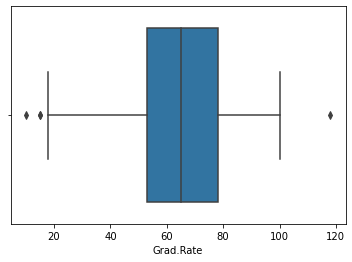

In [32]:
for i in lstnumericcolumns:
    univariateAnalysis_numeric(i,25)

In [33]:
education_num.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

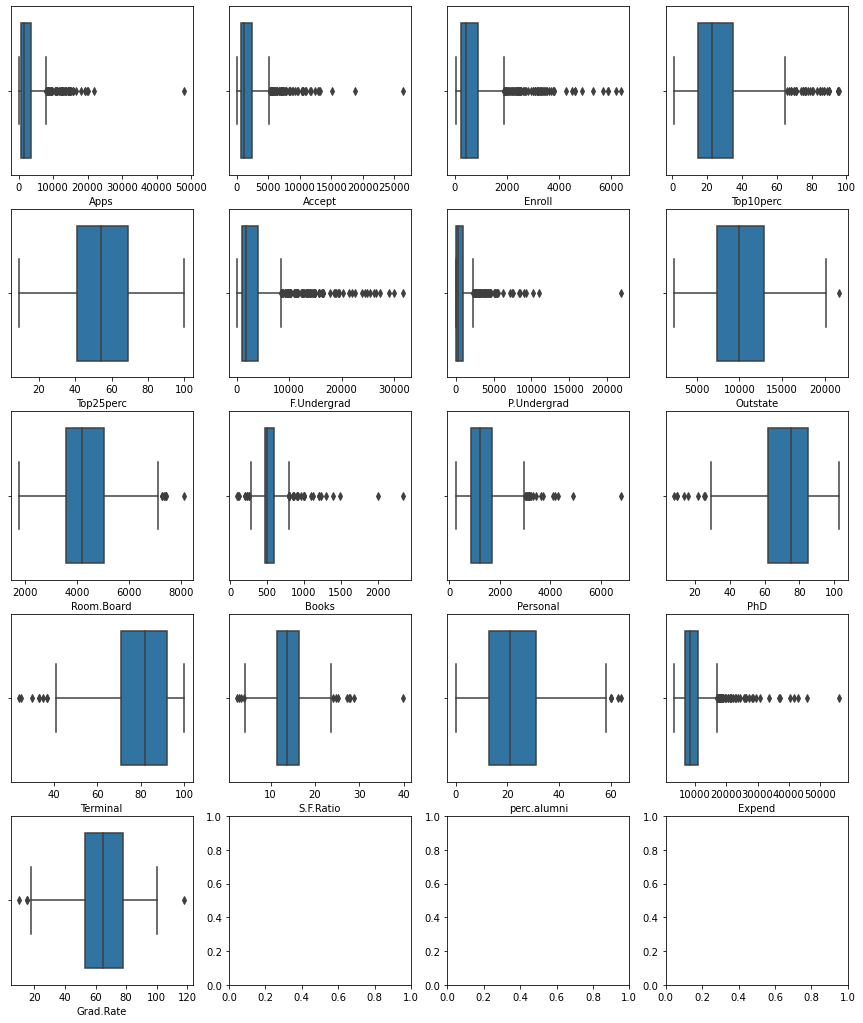

<Figure size 432x288 with 0 Axes>

In [34]:
fig, axes = plt.subplots(nrows=5,ncols=4)
fig.set_size_inches(15,18)

sns.boxplot(x="Apps",data=education_num,ax=axes[0][0])
sns.boxplot(x="Accept",data=education_num,ax=axes[0][1])
sns.boxplot(x="Enroll",data=education_num,ax=axes[0][2])
sns.boxplot(x="Top10perc",data=education_num,ax=axes[0][3])
sns.boxplot(x="Top25perc",data=education_num,ax=axes[1][0])
sns.boxplot(x="F.Undergrad",data=education_num,ax=axes[1][1])
sns.boxplot(x="P.Undergrad",data=education_num,ax=axes[1][2])
sns.boxplot(x="Outstate",data=education_num,ax=axes[1][3])
sns.boxplot(x="Room.Board",data=education_num,ax=axes[2][0])
sns.boxplot(x="Books",data=education_num,ax=axes[2][1])
sns.boxplot(x="Personal",data=education_num,ax=axes[2][2])
sns.boxplot(x="PhD",data=education_num,ax=axes[2][3])
sns.boxplot(x="Terminal",data=education_num,ax=axes[3][0])
sns.boxplot(x="S.F.Ratio",data=education_num,ax=axes[3][1])
sns.boxplot(x="perc.alumni",data=education_num,ax=axes[3][2])
sns.boxplot(x="Expend",data=education_num,ax=axes[3][3])
sns.boxplot(x="Grad.Rate",data=education_num,ax=axes[4][0])


plt.show()
plt.tight_layout()


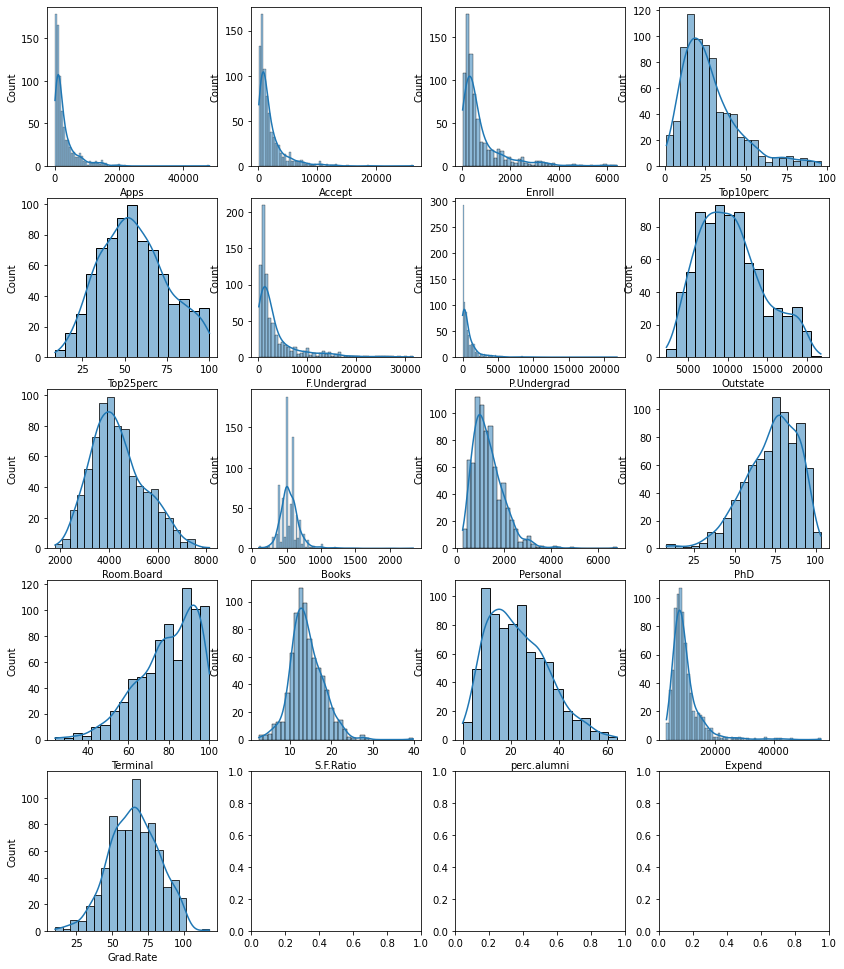

<Figure size 432x288 with 0 Axes>

In [35]:
fig, axes = plt.subplots(nrows=5,ncols=4)
fig.set_size_inches(14,17)

sns.histplot(x="Apps",data=education_num,ax=axes[0][0],kde=True)
sns.histplot(x="Accept",data=education_num,ax=axes[0][1],kde=True)
sns.histplot(x="Enroll",data=education_num,ax=axes[0][2],kde=True)
sns.histplot(x="Top10perc",data=education_num,ax=axes[0][3],kde=True)
sns.histplot(x="Top25perc",data=education_num,ax=axes[1][0],kde=True)
sns.histplot(x="F.Undergrad",data=education_num,ax=axes[1][1],kde=True)
sns.histplot(x="P.Undergrad",data=education_num,ax=axes[1][2],kde=True)
sns.histplot(x="Outstate",data=education_num,ax=axes[1][3],kde=True)
sns.histplot(x="Room.Board",data=education_num,ax=axes[2][0],kde=True)
sns.histplot(x="Books",data=education_num,ax=axes[2][1],kde=True)
sns.histplot(x="Personal",data=education_num,ax=axes[2][2],kde=True)
sns.histplot(x="PhD",data=education_num,ax=axes[2][3],kde=True)
sns.histplot(x="Terminal",data=education_num,ax=axes[3][0],kde=True)
sns.histplot(x="S.F.Ratio",data=education_num,ax=axes[3][1],kde=True)
sns.histplot(x="perc.alumni",data=education_num,ax=axes[3][2],kde=True)
sns.histplot(x="Expend",data=education_num,ax=axes[3][3],kde=True)
sns.histplot(x="Grad.Rate",data=education_num,ax=axes[4][0],kde=True)


plt.show()
plt.tight_layout()


### Multivariate Analysis

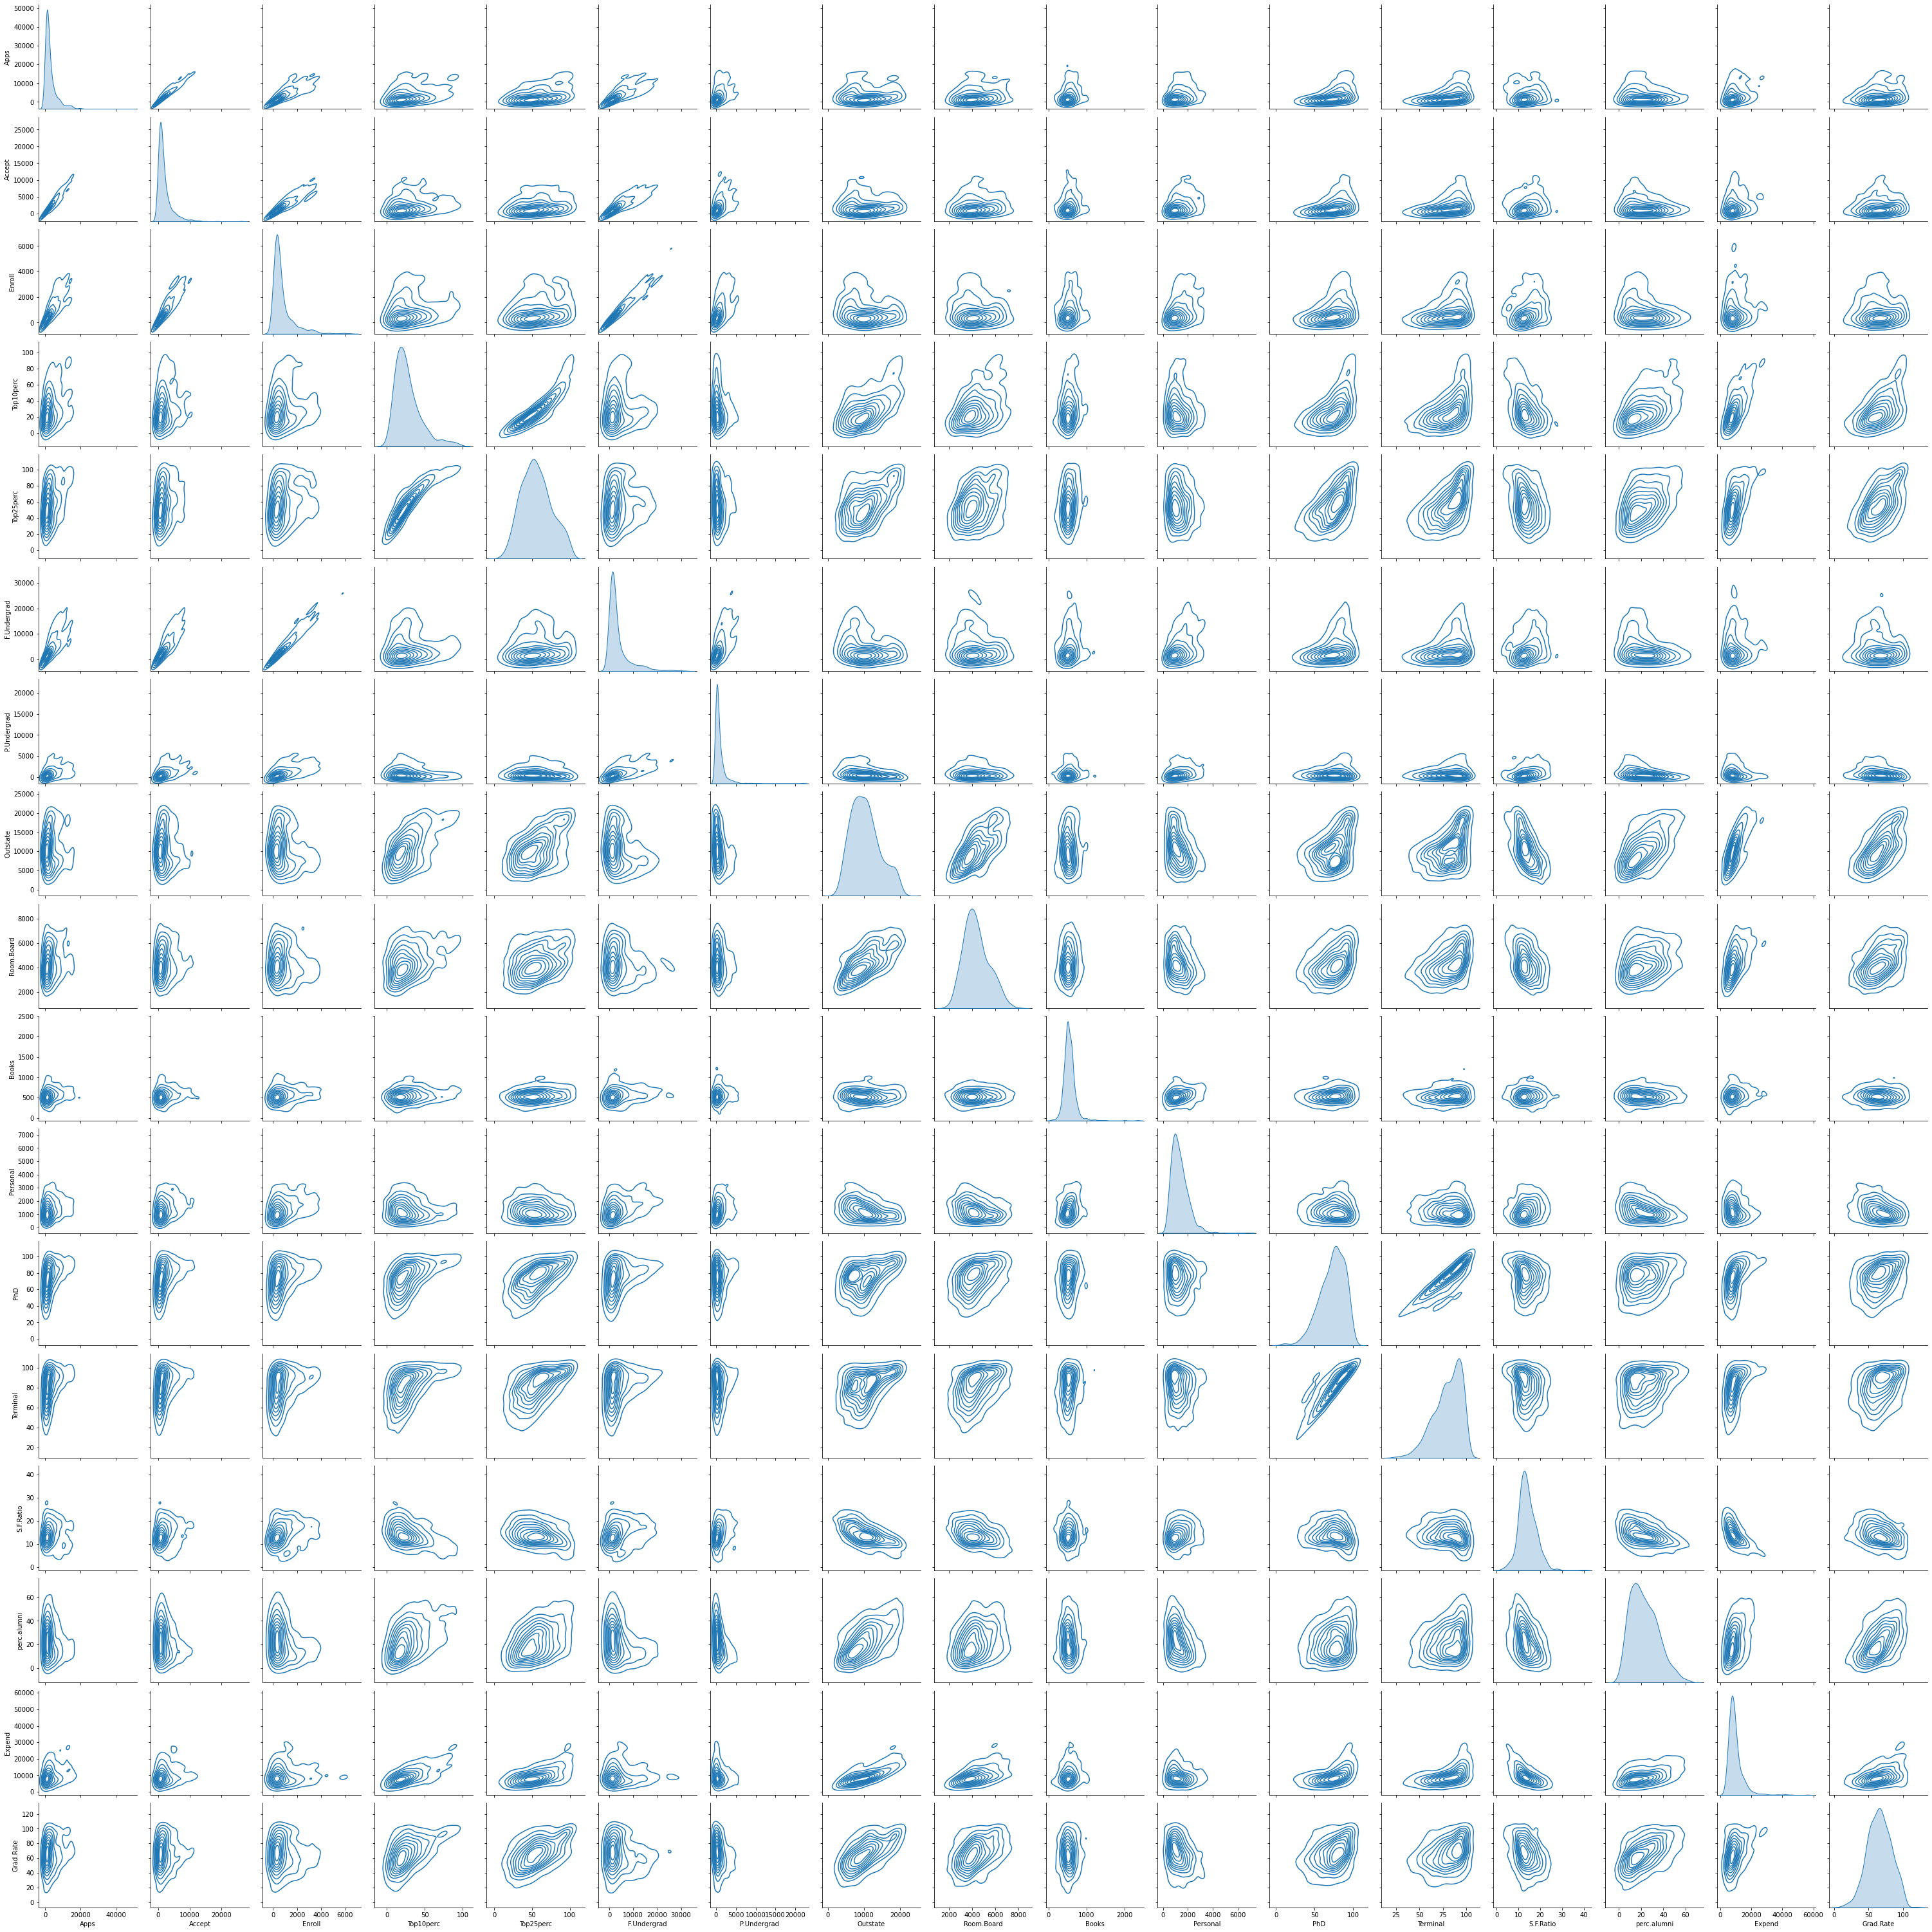

In [36]:
sns.pairplot(education_num,kind='kde')

In [37]:
# 2.1 we see only top25perc has no outlier and other all has outliers

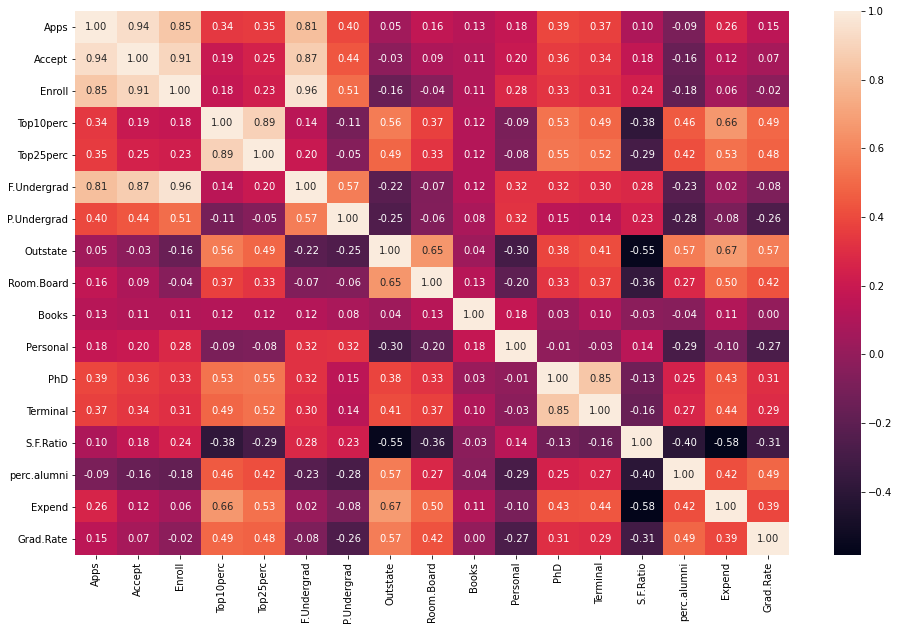

In [38]:
plt.figure(figsize=(16, 10))
g =  education.corr()
sns.heatmap(g,annot=True,fmt='.2f');

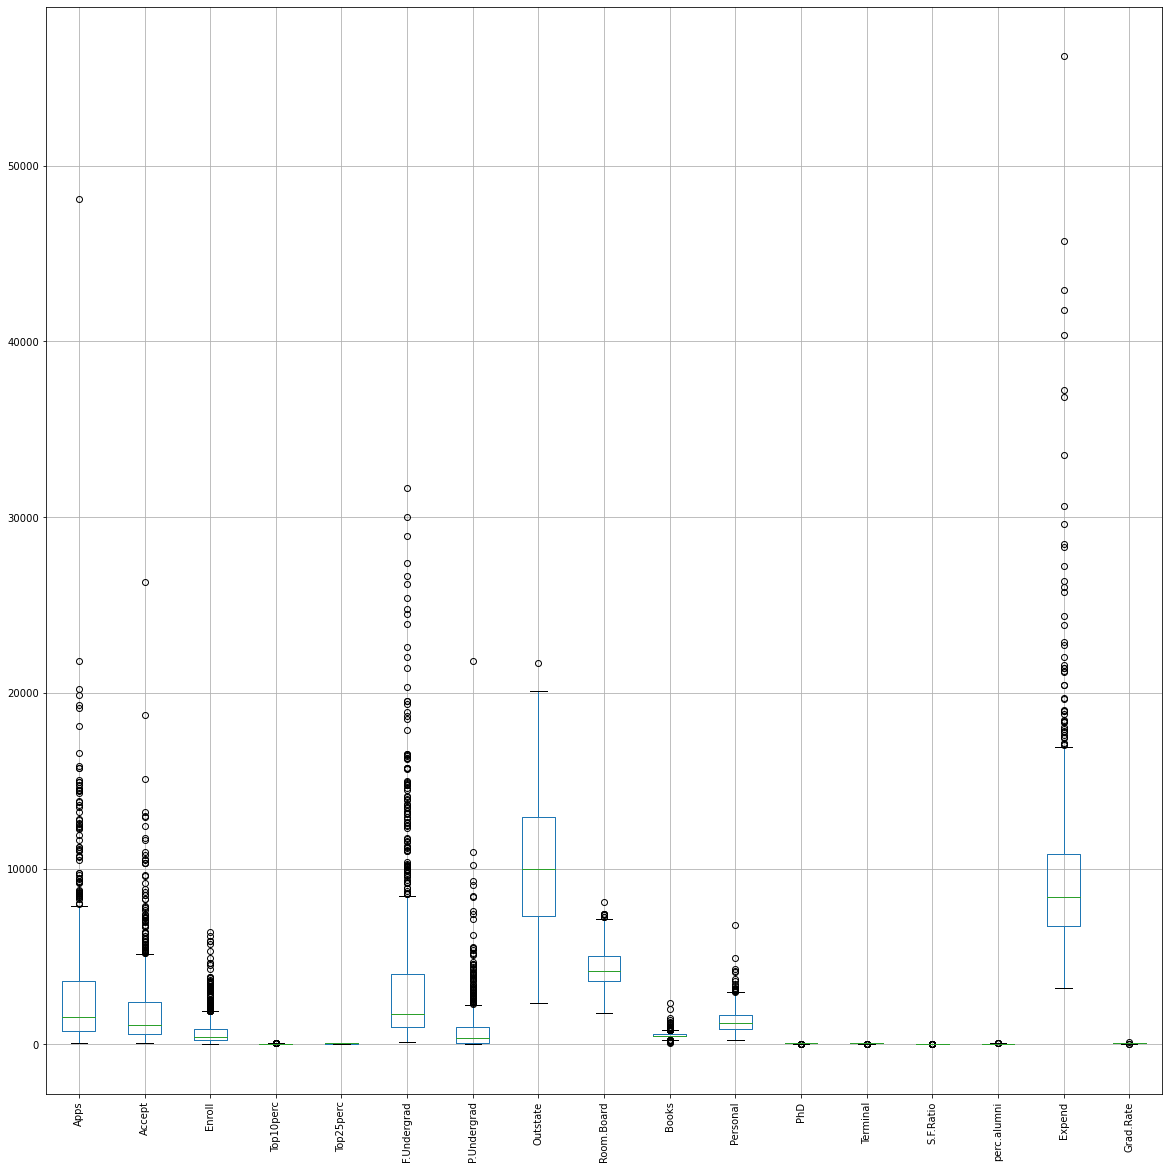

In [39]:
# outlier treatment
education_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
features=education_num.columns
for i in features:
    LL,UL=remove_outlier(education_num[i])
    education_num[i]=np.where(education_num[i]>UL,UL,education_num[i])
    education_num[i]=np.where(education_num[i]<LL,LL,education_num[i])

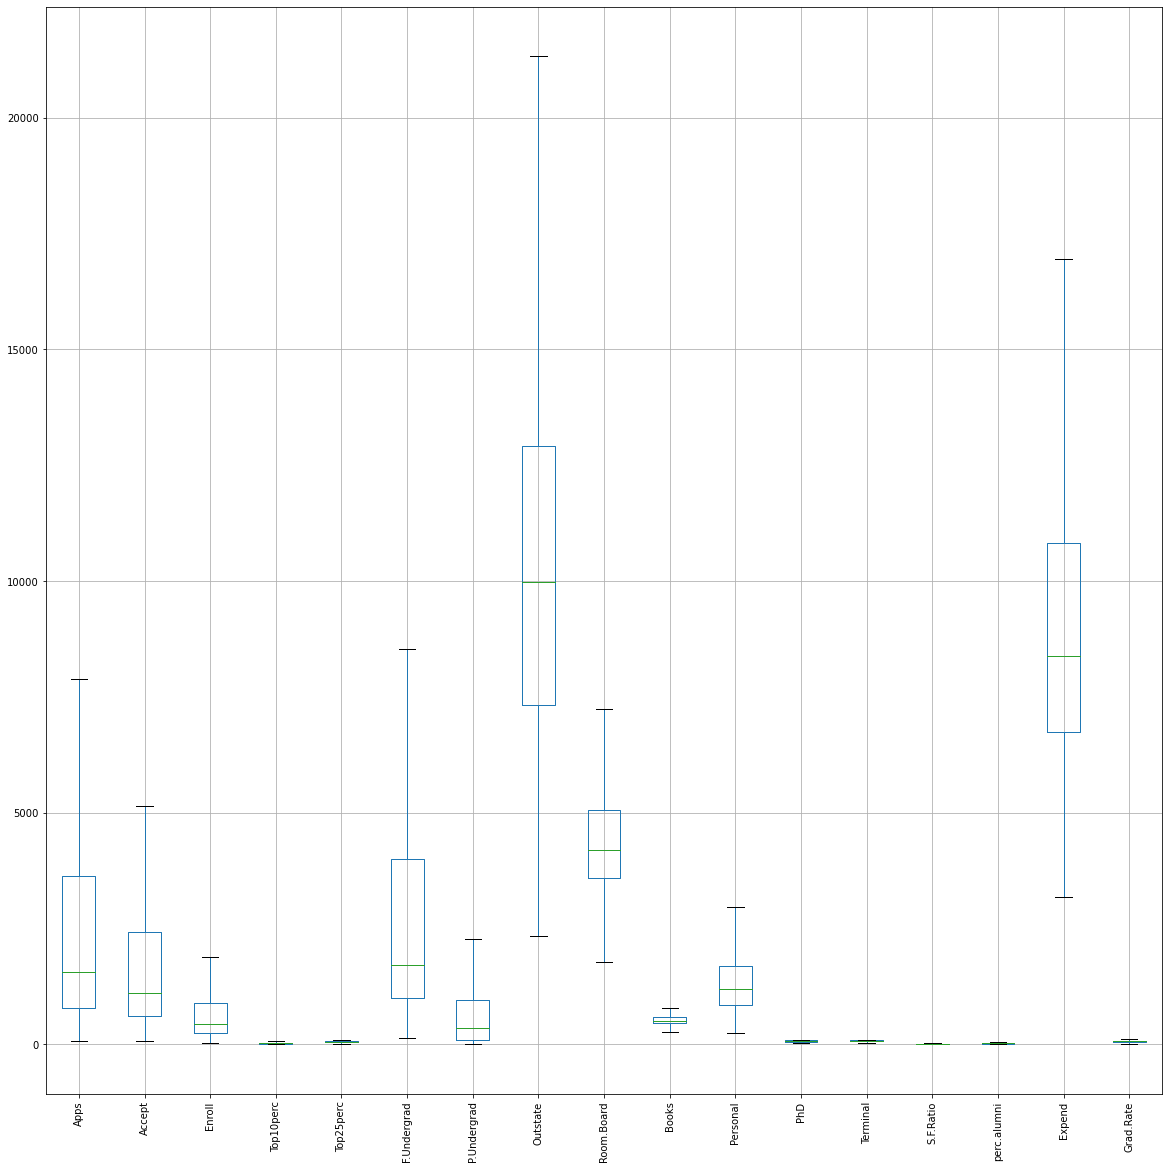

In [42]:
# outlier treatment
education_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [43]:
education_num.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   2571.352638  2422.195279    81.0   776.0  1558.0   
Accept       777.0   1746.280566  1523.286632    72.0   604.0  1110.0   
Enroll       777.0    660.388674   570.126836    35.0   242.0   434.0   
Top10perc    777.0     26.842986    15.582539     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   2935.648005  2700.233049   139.0   992.0  1707.0   
P.Undergrad  777.0    655.884170   716.274014     1.0    95.0   353.0   
Outstate     777.0  10440.196268  4021.712447  2340.0  7320.0  9990.0   
Room.Board   777.0   4355.438224  1090.666009  1780.0  3597.0  4200.0   
Books        777.0    539.425997   115.229712   275.0   470.0   500.0   
Personal     777.0   1323.790219   609.505876   250.0   850.0  1200.0   
PhD          777.0     72.774775    15.953120    27.5    62.0    75.0   
Terminal     777.0     79.782497    14.473057    39.5    71.0    82.0   
S.F.Ratio    777.0     14.051223     3.784212     4.0    11.5    13.6   
perc.alumni  777.0     22.722008    12.325480     0.0    13.0    21.0   
Expend       777.0   9182.523810  3396.496148  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.468468    17.142538    15.5    53.0    65.0   

                 75%      max  
Apps          3624.0   7896.0  
Accept        2424.0   5154.0  
Enroll         902.0   1892.0  
Top10perc       35.0     65.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0   8524.5  
P.Undergrad    967.0   2275.0  
Outstate     12925.0  21332.5  
Room.Board    5050.0   7229.5  
Books          600.0    795.0  
Personal      1700.0   2975.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     24.0  
perc.alumni     31.0     58.0  
Expend       10830.0  16948.5  
Grad.Rate       78.0    115.5

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling

**1 - Yes, scaling is necessary for PCA. Hence it gives a new projection to our dataset.**

**2 - If we normalize our data using zscore, our data ranges between -3 to +3 standard deviation.**

**3 - This normalizing tunes the PCA towards high magnitude features. We can speed up gradient descent and model calculations in algorithm by scaling.**

In [44]:
# apply zscore
education_num_scaled = education_num.apply(zscore)
education_num_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

In [45]:
education_num_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  1.234534e-16  1.000644 -1.028801 -0.741686 -0.418631   
Accept       777.0  1.340626e-16  1.000644 -1.099832 -0.750362 -0.417972   
Enroll       777.0  1.521645e-16  1.000644 -1.097636 -0.734325 -0.397341   
Top10perc    777.0 -2.250452e-18  1.000644 -1.659526 -0.760506 -0.246780   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.911679e-16  1.000644 -1.036373 -0.720271 -0.455309   
P.Undergrad  777.0 -9.573352e-17  1.000644 -0.914882 -0.783562 -0.423133   
Outstate     777.0 -1.583175e-16  1.000644 -2.015414 -0.776337 -0.112014   
Room.Board   777.0 -1.900382e-17  1.000644 -2.362866 -0.695838 -0.142609   
Books        777.0 -4.465183e-16  1.000644 -2.296251 -0.602889 -0.342372   
Personal     777.0 -9.605501e-17  1.000644 -1.762874 -0.777836 -0.203230   
PhD          777.0  4.232636e-16  1.000644 -2.839817 -0.675837  0.139575   
Terminal     777.0  2.460494e-16  1.000644 -2.785068 -0.607208  0.153315   
S.F.Ratio    777.0  3.635016e-16  1.000644 -2.657805 -0.674610 -0.119315   
perc.alumni  777.0  5.765444e-17  1.000644 -1.844686 -0.789281 -0.139801   
Expend       777.0  1.148802e-16  1.000644 -1.766640 -0.716353 -0.237316   
Grad.Rate    777.0 -2.743408e-16  1.000644 -2.916759 -0.727809 -0.027345   

                  75%       max  
Apps         0.434864  2.199689  
Accept       0.445193  2.238524  
Enroll       0.424058  2.161632  
Top10perc    0.523809  2.450281  
Top25perc    0.667104  2.233391  
F.Undergrad  0.396277  2.071100  
P.Undergrad  0.434633  2.261926  
Outstate     0.618245  2.710119  
Room.Board   0.637234  2.636841  
Books        0.526019  2.219381  
Personal     0.617635  2.710841  
PhD          0.766815  1.895848  
Terminal     0.844699  1.397806  
S.F.Ratio    0.647520  2.630716  
perc.alumni  0.672049  2.864044  
Expend       0.485364  2.287940  
Grad.Rate    0.731490  2.920440

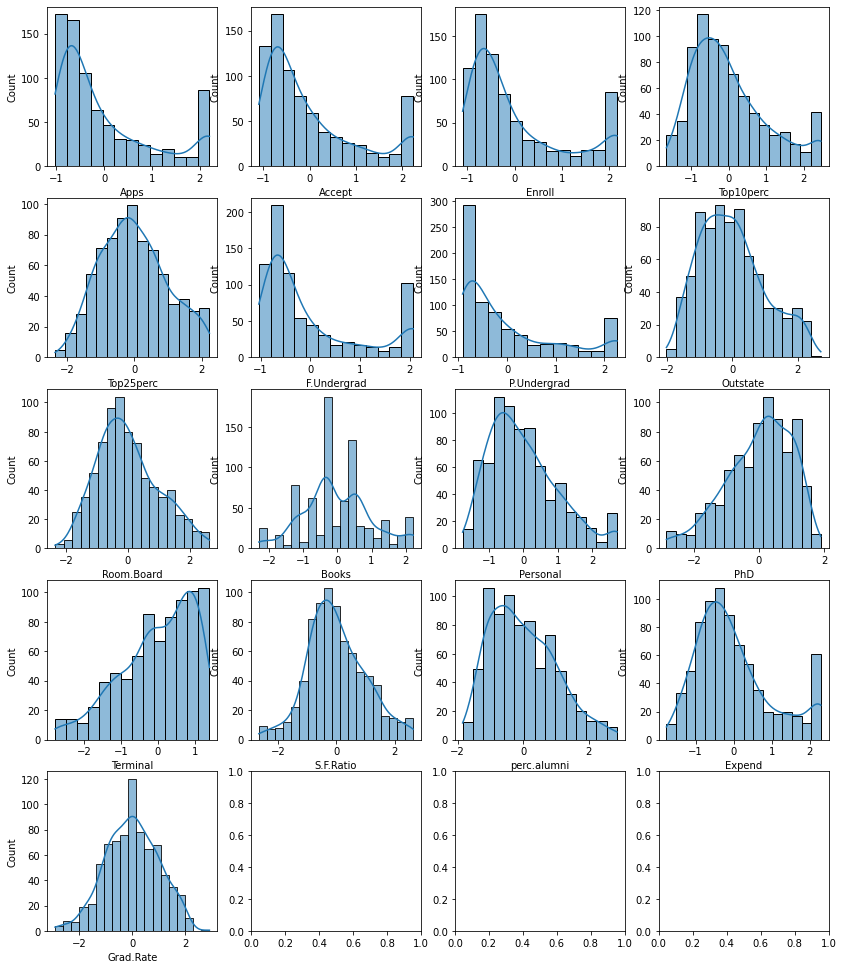

<Figure size 432x288 with 0 Axes>

In [46]:
fig, axes = plt.subplots(nrows=5,ncols=4)
fig.set_size_inches(14,17)

sns.histplot(x="Apps",data=education_num_scaled,ax=axes[0][0],kde=True)
sns.histplot(x="Accept",data=education_num_scaled,ax=axes[0][1],kde=True)
sns.histplot(x="Enroll",data=education_num_scaled,ax=axes[0][2],kde=True)
sns.histplot(x="Top10perc",data=education_num_scaled,ax=axes[0][3],kde=True)
sns.histplot(x="Top25perc",data=education_num_scaled,ax=axes[1][0],kde=True)
sns.histplot(x="F.Undergrad",data=education_num_scaled,ax=axes[1][1],kde=True)
sns.histplot(x="P.Undergrad",data=education_num_scaled,ax=axes[1][2],kde=True)
sns.histplot(x="Outstate",data=education_num_scaled,ax=axes[1][3],kde=True)
sns.histplot(x="Room.Board",data=education_num_scaled,ax=axes[2][0],kde=True)
sns.histplot(x="Books",data=education_num_scaled,ax=axes[2][1],kde=True)
sns.histplot(x="Personal",data=education_num_scaled,ax=axes[2][2],kde=True)
sns.histplot(x="PhD",data=education_num_scaled,ax=axes[2][3],kde=True)
sns.histplot(x="Terminal",data=education_num_scaled,ax=axes[3][0],kde=True)
sns.histplot(x="S.F.Ratio",data=education_num_scaled,ax=axes[3][1],kde=True)
sns.histplot(x="perc.alumni",data=education_num_scaled,ax=axes[3][2],kde=True)
sns.histplot(x="Expend",data=education_num_scaled,ax=axes[3][3],kde=True)
sns.histplot(x="Grad.Rate",data=education_num_scaled,ax=axes[4][0],kde=True)


plt.show()
plt.tight_layout()


<AxesSubplot:>

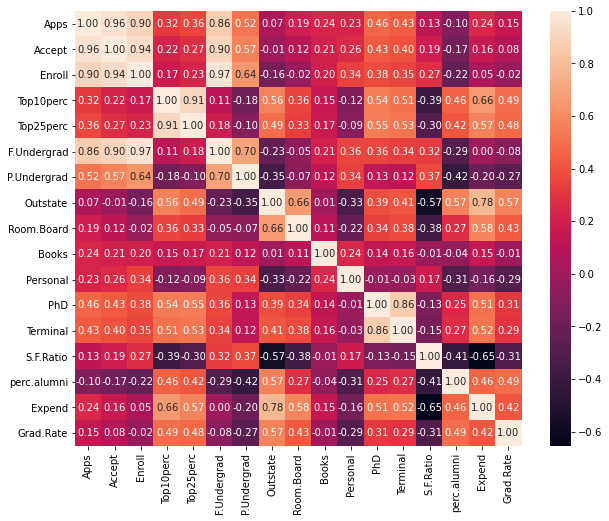

In [47]:
# check presence of correlations
plt.figure(figsize=(10,8))
sns.heatmap(education_num_scaled.corr(),annot=True,fmt='.2f')

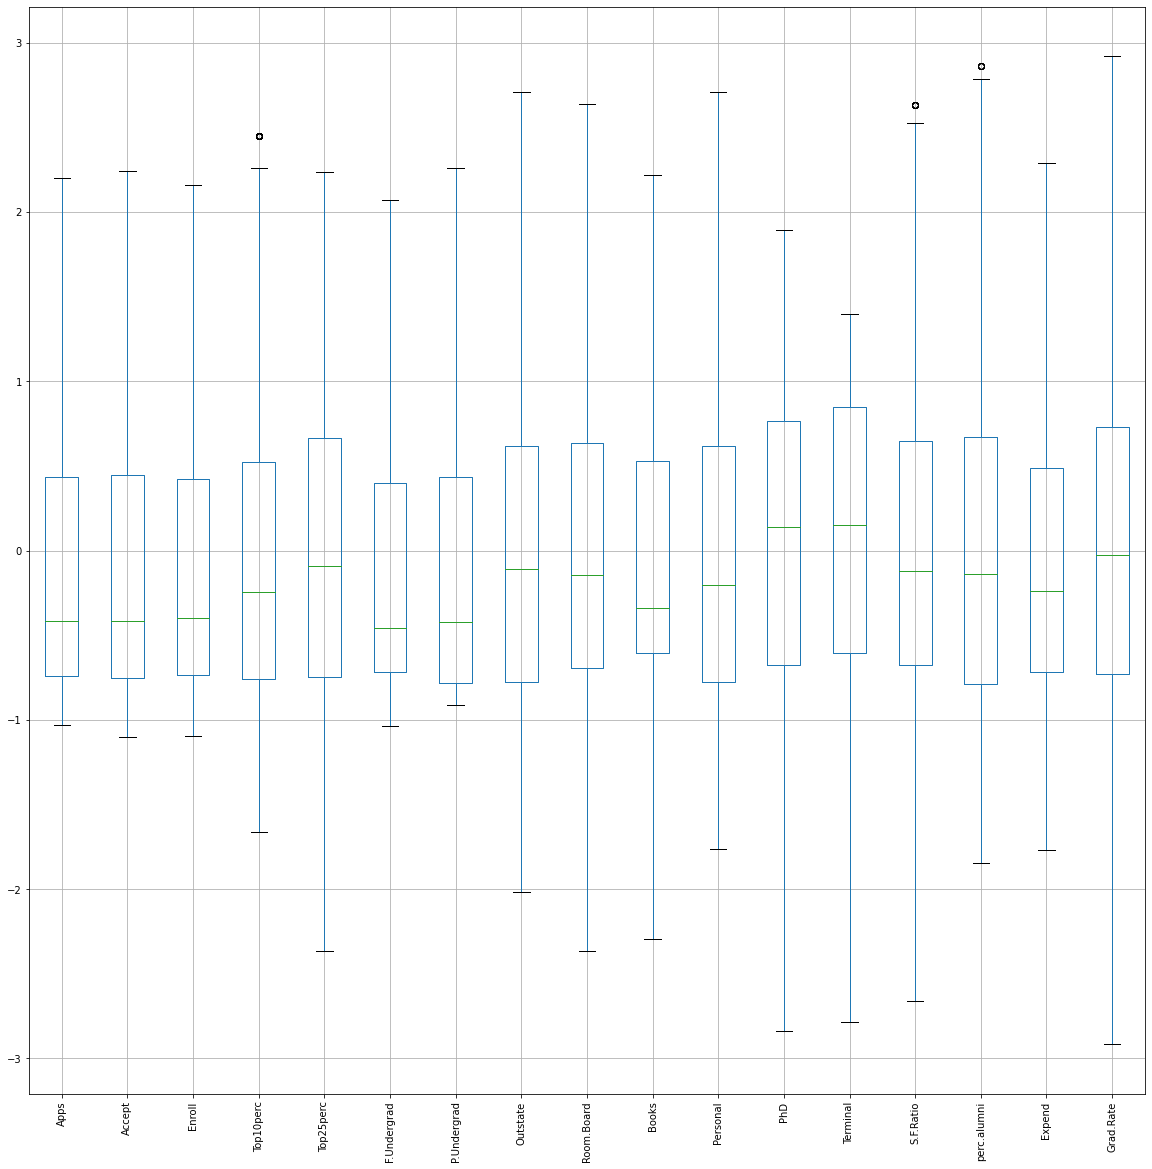

In [48]:
# outlier treatment
education_num_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

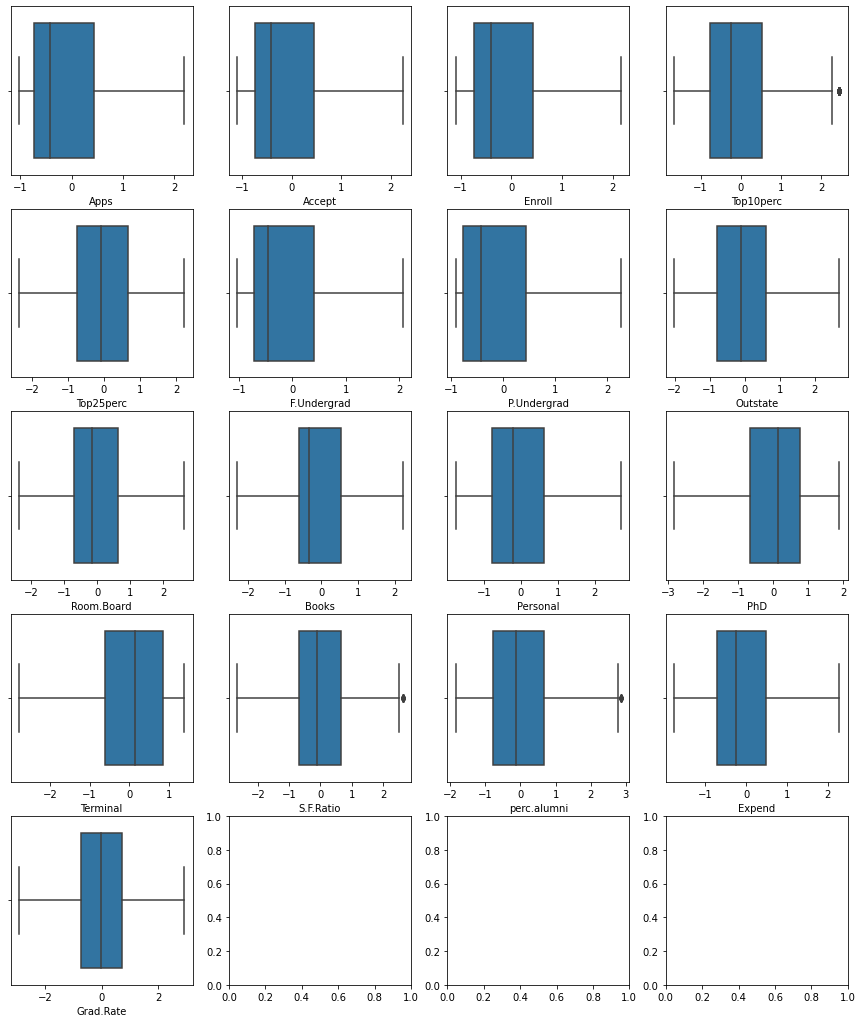

<Figure size 432x288 with 0 Axes>

In [49]:
fig, axes = plt.subplots(nrows=5,ncols=4)
fig.set_size_inches(15,18)

sns.boxplot(x="Apps",data=education_num_scaled,ax=axes[0][0])
sns.boxplot(x="Accept",data=education_num_scaled,ax=axes[0][1])
sns.boxplot(x="Enroll",data=education_num_scaled,ax=axes[0][2])
sns.boxplot(x="Top10perc",data=education_num_scaled,ax=axes[0][3])
sns.boxplot(x="Top25perc",data=education_num_scaled,ax=axes[1][0])
sns.boxplot(x="F.Undergrad",data=education_num_scaled,ax=axes[1][1])
sns.boxplot(x="P.Undergrad",data=education_num_scaled,ax=axes[1][2])
sns.boxplot(x="Outstate",data=education_num_scaled,ax=axes[1][3])
sns.boxplot(x="Room.Board",data=education_num_scaled,ax=axes[2][0])
sns.boxplot(x="Books",data=education_num_scaled,ax=axes[2][1])
sns.boxplot(x="Personal",data=education_num_scaled,ax=axes[2][2])
sns.boxplot(x="PhD",data=education_num_scaled,ax=axes[2][3])
sns.boxplot(x="Terminal",data=education_num_scaled,ax=axes[3][0])
sns.boxplot(x="S.F.Ratio",data=education_num_scaled,ax=axes[3][1])
sns.boxplot(x="perc.alumni",data=education_num_scaled,ax=axes[3][2])
sns.boxplot(x="Expend",data=education_num_scaled,ax=axes[3][3])
sns.boxplot(x="Grad.Rate",data=education_num_scaled,ax=axes[4][0])


plt.show()
plt.tight_layout()


### Confirm the statistical significance of correlation

In [50]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(education_num_scaled)
p_value

0.0

In [51]:
# pvalue is less than 0.05 so the significant correlation exist

### KMO test (adequacy of data)

In [52]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(education_num_scaled)
kmo_model

0.8494624668231406

In [53]:
# 0.8494624668231406 which means we have adequate sample

### Covariance matrix

In [54]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(education_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [55]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
cov_matrix = np.cov(education_num_scaled.T).T
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-01

## Comparing Correlation and Covariance Matrix

In [56]:
# Now without Scaling lets check out correlation matrix
education_corr = education_num_scaled.copy()
education_corr.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [57]:
#With standardisation (Without standardisation also, correlation matrix yields same result)
education_num_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

 **`Covariance` indicates the direction of the linear relationship between variables. `Correlation` on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

**We can  state that above three approaches yield the same eigenvectors and eigenvalue pairs:**

- **Eigen decomposition of the covariance matrix after standardizing the data.**

- **Eigen decomposition of the correlation matrix.**

- **Eigen decomposition of the correlation matrix after standardizing the data.**

**Finally we can say that after scaling - the covariance and the correlation have the same values**

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

#### `Before scaling` only the one attribute `Top25perc` doesnot have any outlier other all 16 attributes has more outlier so we treated it with zscore by scaling.
#### `zscore` just centers the data
#### `After scaling` all the attributes ranged between -3 to +3 standard deviation, Hence there are few outliers that will not be affecting our business model

## 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [58]:
# solution 2.5
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

## cumulative distribution

In [59]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp

[33.26608366671338,
 28.755345008170814,
 6.617163554717699,
 5.898143957623805,
 5.12389267233913,
 4.498638671546999,
 3.4362426556658123,
 3.1988471732051984,
 2.4881075492912617,
 2.2383964542420536,
 1.4511567777537842,
 0.8651434488112961,
 0.7892466165436423,
 0.5806273152471964,
 0.43878768621190467,
 0.2226187168145246,
 0.13155807510148804]

In [60]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


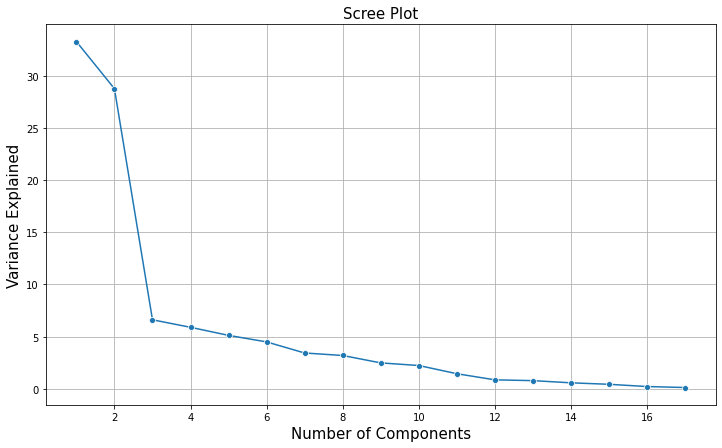

In [61]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

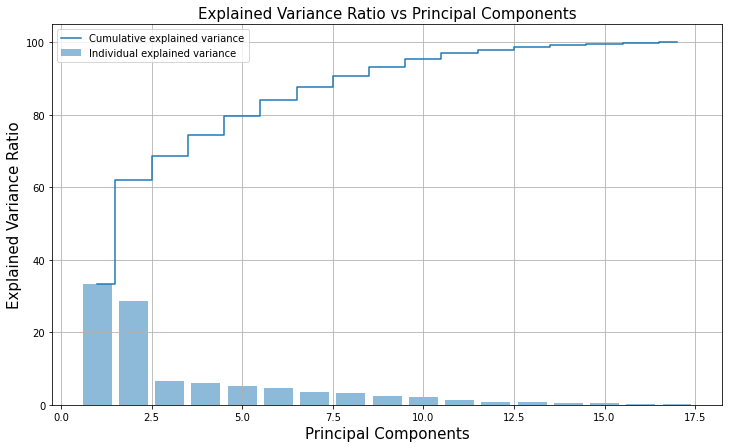

In [62]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [63]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=17,random_state=123)
data_reduced = pca.fit_transform(education_num_scaled)
data_reduced.transpose()

array([[-1.60249937e+00, -1.80467545e+00, -1.60828257e+00, ...,
        -5.76882673e-01,  6.57095200e+00, -4.77393067e-01],
       [ 9.93683013e-01, -7.04149922e-02, -1.38279212e+00, ...,
         1.77984611e-02, -1.18493014e+00,  1.04394672e+00],
       [ 3.00447636e-02,  2.12212752e+00, -5.01512552e-01, ...,
         3.22160336e-01,  1.32596561e+00, -1.42543835e+00],
       ...,
       [ 3.09482851e-03, -3.24329699e-01,  7.30303781e-02, ...,
        -1.62407776e-01, -9.64378943e-02, -5.59570376e-03],
       [-3.06898585e-02, -1.63392355e-01, -2.36336429e-02, ...,
        -2.70575811e-01,  9.57356063e-01, -6.78126913e-02],
       [-1.47130758e-01,  1.92958540e-01,  4.32362016e-03, ...,
         3.87433636e-02, -4.55356845e-01, -4.89303358e-02]])

In [64]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [65]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243, 0.03198847, 0.02488108, 0.02238396,
       0.01451157, 0.00865143, 0.00789247, 0.00580627, 0.00438788,
       0.00222619, 0.00131558])

## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [66]:
education_extracted_loadings = pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                                                       'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [67]:
education_extracted_loadings.T

0         1         2         3         4         5         6   \
PC1   0.262172  0.230562  0.189276  0.338875  0.334691  0.163293  0.022480   
PC2   0.314136  0.344624  0.382813 -0.099319 -0.059506  0.398636  0.357550   
PC3  -0.081018 -0.107659 -0.085530  0.078829  0.050794 -0.073708 -0.040357   
PC4   0.098776  0.118140  0.009307 -0.369115 -0.416824  0.013950  0.225351   
PC5   0.219898  0.189635  0.162315  0.157211  0.144449  0.102728 -0.095679   
PC6   0.002188 -0.016521 -0.068079 -0.088866 -0.027627 -0.051647 -0.024538   
PC7  -0.028372 -0.012958 -0.015240 -0.257455 -0.239039 -0.031175 -0.010014   
PC8  -0.089950 -0.137606 -0.144217  0.289539  0.345644 -0.108749  0.123842   
PC9  -0.130567 -0.142276 -0.050871  0.122468  0.193936 -0.001455  0.634774   
PC10 -0.156464 -0.149210 -0.064900 -0.035878  0.006418 -0.000164  0.546346   
PC11 -0.086213 -0.042590 -0.043841  0.001778 -0.102127 -0.034999  0.252107   
PC12 -0.089978 -0.158862  0.035399  0.039228 -0.145622  0.133556 -0.050249   
PC13 -0.088870 -0.043795  0.061924 -0.069960  0.097028  0.087175 -0.044554   
PC14 -0.549428 -0.291572  0.417001 -0.008798  0.010778  0.570684 -0.146321   
PC15  0.005415  0.014458 -0.049791 -0.723645  0.655465  0.025306 -0.039715   
PC16  0.599138 -0.661497 -0.233235 -0.022145 -0.032265  0.367681 -0.026249   
PC17 -0.182170  0.391042 -0.716685  0.056205 -0.019674  0.542775 -0.029503   

            7         8         9         10        11        12        13  \
PC1   0.283547  0.244187  0.096708 -0.035230  0.326411  0.323116 -0.163152   
PC2  -0.251864 -0.131909  0.093974  0.232440  0.055139  0.043033  0.259805   
PC3  -0.014939  0.021138  0.697121  0.530973 -0.081113 -0.058979 -0.274151   
PC4   0.262975  0.580894 -0.036156 -0.114983 -0.147261 -0.089008 -0.259486   
PC5   0.037275 -0.069108  0.035406 -0.000475 -0.550787 -0.590407 -0.142843   
PC6  -0.020386  0.237267  0.638605 -0.381496  0.003344  0.035412  0.468753   
PC7   0.094537  0.094521 -0.111193  0.639418  0.089232  0.091699  0.152865   
PC8   0.011272  0.389639 -0.239817  0.277207 -0.034263 -0.090308  0.242808   
PC9   0.008366  0.220527 -0.021025 -0.017372 -0.166510 -0.112609  0.153685   
PC10 -0.231800 -0.255108  0.091162 -0.127648  0.100975  0.086036 -0.470528   
PC11  0.593433 -0.475297  0.043570  0.015163 -0.039187 -0.084858  0.363043   
PC12 -0.560393  0.107366 -0.051622 -0.009394  0.071659 -0.163821  0.239903   
PC13 -0.067241 -0.017772 -0.035434  0.011860 -0.702656  0.662489  0.047901   
PC14  0.211561  0.100935  0.028638 -0.033820  0.063810 -0.098502 -0.061997   
PC15 -0.001593 -0.028258 -0.008063  0.001426  0.083147 -0.113374  0.003832   
PC16  0.081425 -0.026778 -0.010462 -0.004546 -0.012514  0.017928 -0.018306   
PC17 -0.001034 -0.009857 -0.004361  0.010873 -0.013315 -0.007381 -0.008858   

            14        15        16  
PC1   0.186611  0.328956  0.238822  
PC2  -0.257093 -0.160009 -0.167524  
PC3  -0.103716  0.184206 -0.245336  
PC4  -0.223982  0.213756 -0.036192  
PC5   0.128216 -0.022424  0.356843  
PC6   0.012567 -0.231562  0.313556  
PC7   0.391401 -0.150501  0.468642  
PC8  -0.566073 -0.118824  0.180459  
PC9   0.539236 -0.024237 -0.315813  
PC10 -0.147629 -0.080415  0.488415  
PC11 -0.173919  0.393723  0.087264  
PC12  0.048975  0.690417  0.159332  
PC13 -0.035888  0.126668  0.063074  
PC14 -0.028081 -0.128739  0.007096  
PC15 -0.007326  0.145100 -0.003290  
PC16  0.000080 -0.056007 -0.014841  
PC17  0.024053 -0.010566  0.002510

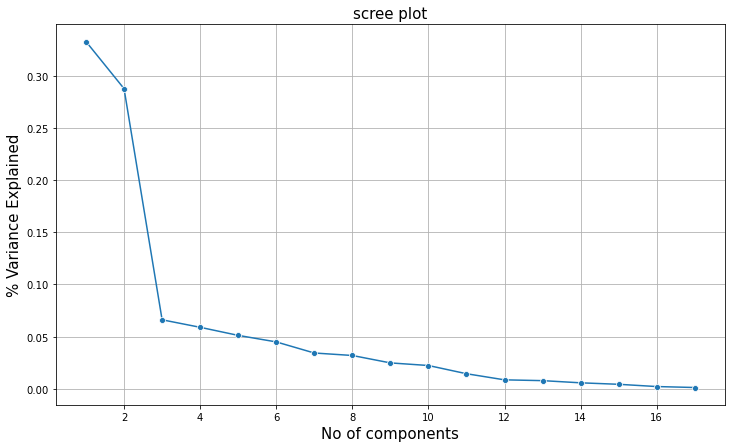

In [68]:
plt.figure(figsize=(12,7))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,18),marker='o')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('No of components',fontsize=15)
plt.title('scree plot',fontsize=15)
plt.grid()
plt.show()

In [69]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 4)

pca = PCA(n_components=8,random_state=123)
data_reduced = pca.fit_transform(education_num_scaled)
data_reduced.transpose()

array([[-1.60249937e+00, -1.80467545e+00, -1.60828257e+00, ...,
        -5.76882673e-01,  6.57095200e+00, -4.77393067e-01],
       [ 9.93683013e-01, -7.04149922e-02, -1.38279212e+00, ...,
         1.77984611e-02, -1.18493014e+00,  1.04394672e+00],
       [ 3.00447636e-02,  2.12212752e+00, -5.01512552e-01, ...,
         3.22160336e-01,  1.32596561e+00, -1.42543835e+00],
       ...,
       [-6.97475824e-01,  9.94858508e-01, -1.02623665e+00, ...,
         5.04042792e-01, -8.22745604e-01,  1.05180970e+00],
       [ 7.10616255e-01, -3.96083169e-01, -1.65310575e-01, ...,
        -1.45835209e+00,  1.20132639e+00,  1.07308672e+00],
       [ 8.95166868e-01,  2.59664018e-01, -4.08817874e-01, ...,
        -2.89146665e-01,  5.73988519e-03,  6.05416581e-01]])

In [70]:
education_extracted_loadings = pd.DataFrame(pca.components_,columns=list(education_num_scaled),index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
education_extracted_loadings.T

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.262172  0.314136 -0.081018  0.098776  0.219898  0.002188   
Accept       0.230562  0.344624 -0.107659  0.118140  0.189635 -0.016521   
Enroll       0.189276  0.382813 -0.085530  0.009307  0.162315 -0.068079   
Top10perc    0.338875 -0.099319  0.078829 -0.369115  0.157211 -0.088866   
Top25perc    0.334691 -0.059506  0.050794 -0.416824  0.144449 -0.027627   
F.Undergrad  0.163293  0.398636 -0.073708  0.013950  0.102728 -0.051647   
P.Undergrad  0.022480  0.357550 -0.040357  0.225351 -0.095679 -0.024538   
Outstate     0.283547 -0.251864 -0.014939  0.262975  0.037275 -0.020386   
Room.Board   0.244187 -0.131909  0.021138  0.580894 -0.069108  0.237267   
Books        0.096708  0.093974  0.697121 -0.036156  0.035406  0.638605   
Personal    -0.035230  0.232440  0.530973 -0.114983 -0.000475 -0.381496   
PhD          0.326411  0.055139 -0.081113 -0.147261 -0.550787  0.003344   
Terminal     0.323116  0.043033 -0.058979 -0.089008 -0.590407  0.035412   
S.F.Ratio   -0.163152  0.259805 -0.274151 -0.259486 -0.142843  0.468753   
perc.alumni  0.186611 -0.257093 -0.103716 -0.223982  0.128216  0.012567   
Expend       0.328956 -0.160009  0.184206  0.213756 -0.022424 -0.231562   
Grad.Rate    0.238822 -0.167524 -0.245336 -0.036192  0.356843  0.313556   

                  PC7       PC8  
Apps        -0.028372 -0.089950  
Accept      -0.012958 -0.137606  
Enroll      -0.015240 -0.144217  
Top10perc   -0.257455  0.289539  
Top25perc   -0.239039  0.345644  
F.Undergrad -0.031175 -0.108749  
P.Undergrad -0.010014  0.123842  
Outstate     0.094537  0.011272  
Room.Board   0.094521  0.389639  
Books       -0.111193 -0.239817  
Personal     0.639418  0.277207  
PhD          0.089232 -0.034263  
Terminal     0.091699 -0.090308  
S.F.Ratio    0.152865  0.242808  
perc.alumni  0.391401 -0.566073  
Expend      -0.150501 -0.118824  
Grad.Rate    0.468642  0.180459

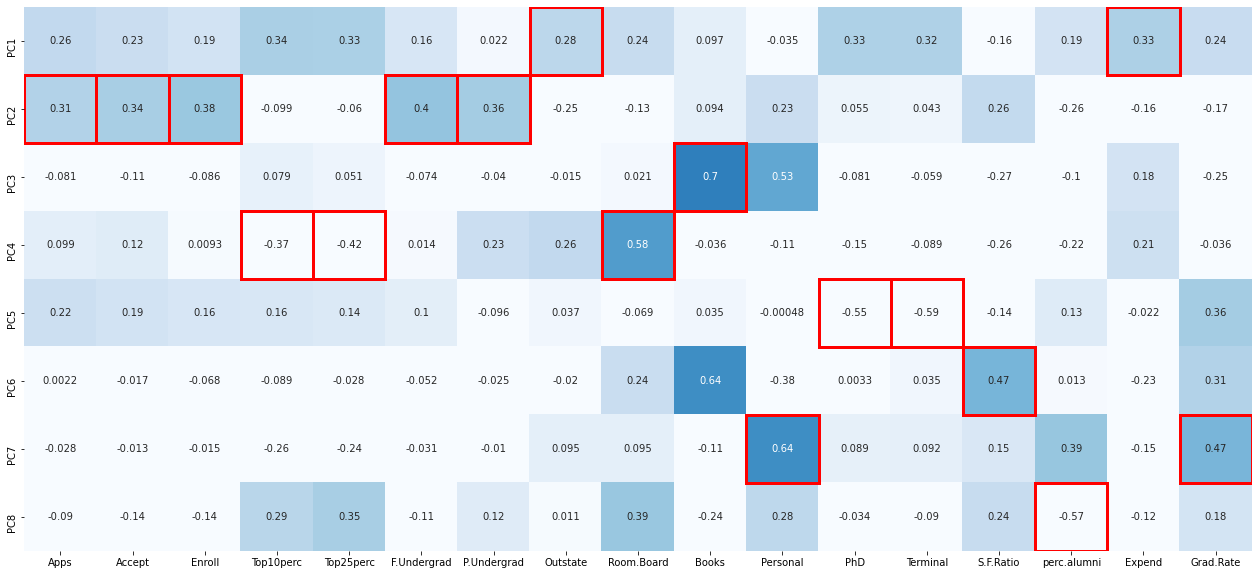

In [71]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(education_extracted_loadings, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

column_max = education_extracted_loadings.abs().idxmax(axis=0)

for col, variable in enumerate(education_extracted_loadings.columns):
    position = education_extracted_loadings.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [72]:
education_extracted_loadings.iloc[0,:].values

array([ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
        0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
       -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
        0.32895585,  0.23882245])

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

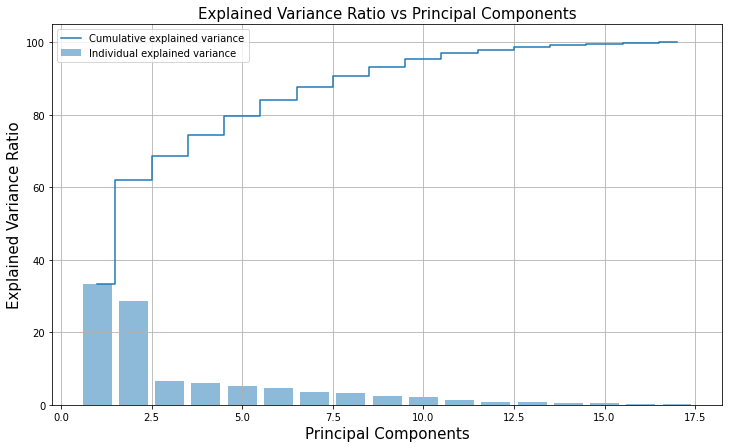

In [73]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [74]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
var #cumulative sum of variance explained with [n] features

array([33., 62., 69., 75., 80., 84., 87., 90.])

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

The business implication of using the PCA :
* PCA is used for dimensionality reduction
* PCA increases the signal content that is provided to your algorithm to build your model.
* PCA helps to eliminate the unwanted, unnecessary dimensions
* when the two independent variables are strongly interacting with each other, where 'r' value close to 1. then we are providing the same amount of information to our algorithm in two dimensions. these are call redundants.
* when we have too many redundant dimensions, then we are exploring it ourself to curse of dimensionality.

Implications on case study :
* So in our case study there are 18 attributes which are correlated to each and hence it is making the curse of dimensionality. That is why we are reducing 18 to 8 attributes and hence 
* The first component contained 33% of data and second component has 62% and so on, after 90% there was no much variation in the projected data, so we stopped with 8 components.